**Desarrollado por:** Javier Fernando Botía Valderrama

*Docente del Departamento de Ingeniería de Sistemas*

**Materia:** Análisis Avanzado de Datos

**Departamento:** Ingeniería Aeroespacial

**Facultad de Ingeniería - Universidad de Antioquia**

# Escalamiento de Datos

In [1]:
import pandas as pd
import io
import requests
from sklearn.preprocessing import StandardScaler # Escalamiento estándar
from sklearn.preprocessing import RobustScaler # Escalamiento robusto
from sklearn.preprocessing import MinMaxScaler # MinMaxScaler es una librería que permite 
                                               # hacer diferentes escalas de los datos cuando ajustes de valores máximos y mínimos.
from sklearn.preprocessing import Normalizer # Librería para normalizar datos en una escala deseada
import seaborn as sns # Librería de visualización para data science
import numpy as np
from matplotlib import pyplot as plt
import matplotlib

Por lo general, el escalamiento de datos es un conjunto de transformaciones de los datos tal que reduce la sensibilidad de la escala de entrada de los modelos de machine learning. Inicialmente, vamos a analizar dos transformaciones matemáticas: **escalamiento estándar** y **escalamiento robusto**. Más adelante, se explicará un caso especial del escalamiento de datos llamado **normalización de datos**, donde vamos a conocer cuatro transformaciones para normalizar. Lo anterior permite establecer que la normalización es un *caso especial* del escalamiento de datos.

In [2]:
url = "https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/phoneme.dat"
download = requests.get(url).content
data = pd.read_table(io.StringIO(download.decode('utf-8')), sep=',',
                     decimal = ',')
# Esimportante codificarlo a utf-8
display(data.head(20))

,Aa,Ao,Dcl,Iy,Sh,Class
0,1.24,0.875,-0.205,-0.078,0.067,0
1,0.268,1.352,1.035,-0.332,0.217,0
2,1.567,0.867,1.3,1.041,0.559,0
3,0.279,0.99,2.555,-0.738,0.0,0
4,0.307,1.272,2.656,-0.946,-0.467,0
5,0.96,0.712,-0.143,0.091,-0.061,0
6,2.941,0.657,1.493,-0.331,-0.123,0
7,0.401,1.159,2.064,-0.69,-0.308,0
8,0.229,1.748,0.634,0.259,0.0,0
9,0.303,0.609,0.474,1.427,-0.811,1


## Escalamiento Estándar

Es una transformación donde los datos son restados por la media de cada característica y dividido por la varianza de cada característica.

$$\hat{x}_{n,d} = \frac{x_{n,d} - m_{d}}{\sigma_d}$$

donde:

*   $\hat{x}_{n,d}$ es una muestra escalada de una muestra $n$ con respecto a una característica $d$.
*   $x_{n,d}$ es una muestra no escalada de una muestra $n$ con respecto a una característica $d$.
*   $m_{d}$ es la media de una característica $d$.
*   $\sigma_d$ es la varianza de una característica $d$.

Si la media es 0 y la varianza es 1, los datos originales tendrán una *distribución Gaussiana*. Veamos una ejemplo aplicativo del escalamiento estándar

In [3]:
data = data[['Aa',	' Ao',	' Dcl',	' Iy',	' Sh']]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5404 entries, 0 to 5403
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Aa      5404 non-null   object
 1    Ao     5404 non-null   object
 2    Dcl    5404 non-null   object
 3    Iy     5404 non-null   object
 4    Sh     5404 non-null   object
dtypes: object(5)
memory usage: 211.2+ KB


In [4]:
data = data.astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5404 entries, 0 to 5403
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Aa      5404 non-null   float64
 1    Ao     5404 non-null   float64
 2    Dcl    5404 non-null   float64
 3    Iy     5404 non-null   float64
 4    Sh     5404 non-null   float64
dtypes: float64(5)
memory usage: 211.2 KB


In [5]:
SS = StandardScaler()
data_SS = SS.fit_transform(data) # Se realiza la transformación del conjunto de datos. Para este caso, utilizaremos los datos imputados por la media de los ejemplos anteriores.
print(data_SS)  # Resultado del escalamiento estándar

[[ 0.49035227 -0.45101251 -1.04796119 -0.59857896 -0.02018657]
 [-0.64165252  0.10951862  0.29207121 -0.91749121  0.24042422]
 [ 0.87118105 -0.46041345  0.57844911  0.80639274  0.83461682]
 ...
 [ 0.24694795 -0.79297175  1.19010906  1.42287272 -1.30239164]
 [-0.77907698 -0.38285569  1.72720269 -1.43227084 -1.20857176]
 [-0.79421696 -0.64020646  0.63248267  0.71975909 -1.23115802]]


In [6]:
data_SS = pd.DataFrame(data_SS, columns = ['Aa',	' Ao',	' Dcl',	' Iy',	' Sh'])
display(data_SS)

,Aa,Ao,Dcl,Iy,Sh
0,0.490352,-0.451013,-1.047961,-0.598579,-0.020187
1,-0.641653,0.109519,0.292071,-0.917491,0.240424
2,0.871181,-0.460413,0.578449,0.806393,0.834617
3,-0.628842,-0.315874,1.934692,-1.427249,-0.136593
4,-0.596233,0.015509,2.043839,-1.688405,-0.947961
...,...,...,...,...,...
5399,-0.657957,1.331641,-0.081841,1.794518,-1.081741
5400,-0.044206,-0.010343,0.030549,-0.019766,1.281130
5401,0.246948,-0.792972,1.190109,1.422873,-1.302392
5402,-0.779077,-0.382856,1.727203,-1.432271,-1.208572


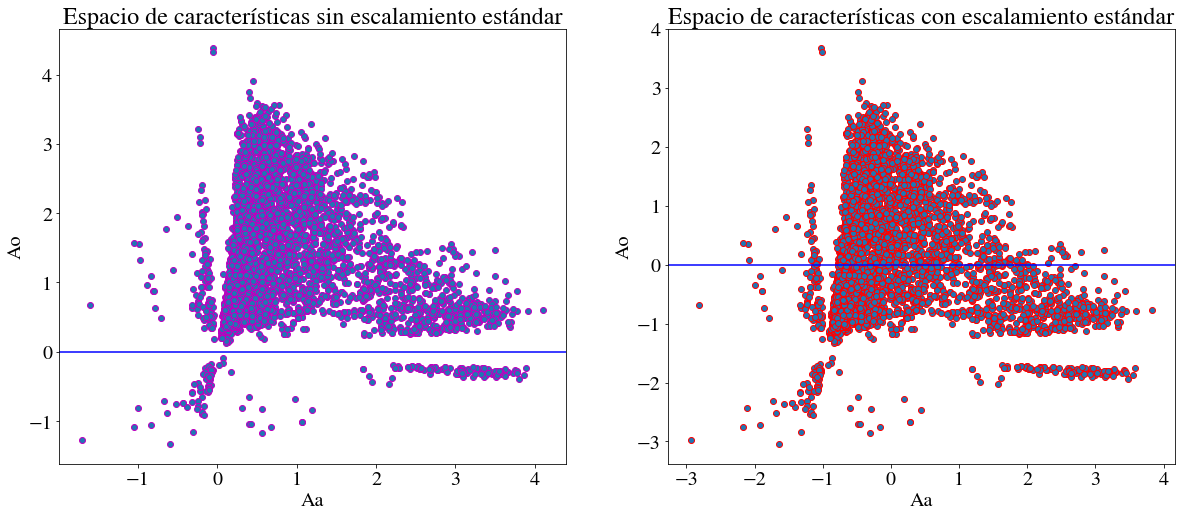

In [7]:
fig = plt.figure(figsize=(20,8)) # Se define el tamaño de la figura en ancho y altura    

matplotlib.rcParams.update({'font.size': 20, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

ax = fig.add_subplot(1, 2, 1)   
ax.scatter(data['Aa'], data[' Ao'], edgecolors="m")
plt.axhline(0, color="blue") # Elegir color de la linea horizontal de referencia
plt.title('Espacio de características sin escalamiento estándar') # Titulo de la gráfica
plt.xlabel('Aa') # Etiqueta del eje x
plt.ylabel('Ao') # Etiqueta del eje y

ax = fig.add_subplot(1, 2, 2) 
ax.scatter(data_SS['Aa'], data_SS[' Ao'], edgecolors="r")
plt.axhline(0, color="blue") # Elegir color de la linea horizontal de referencia
plt.title('Espacio de características con escalamiento estándar') # Titulo de la gráfica
plt.xlabel('Aa') # Etiqueta del eje x
plt.ylabel('Ao') # Etiqueta del eje y

plt.show()

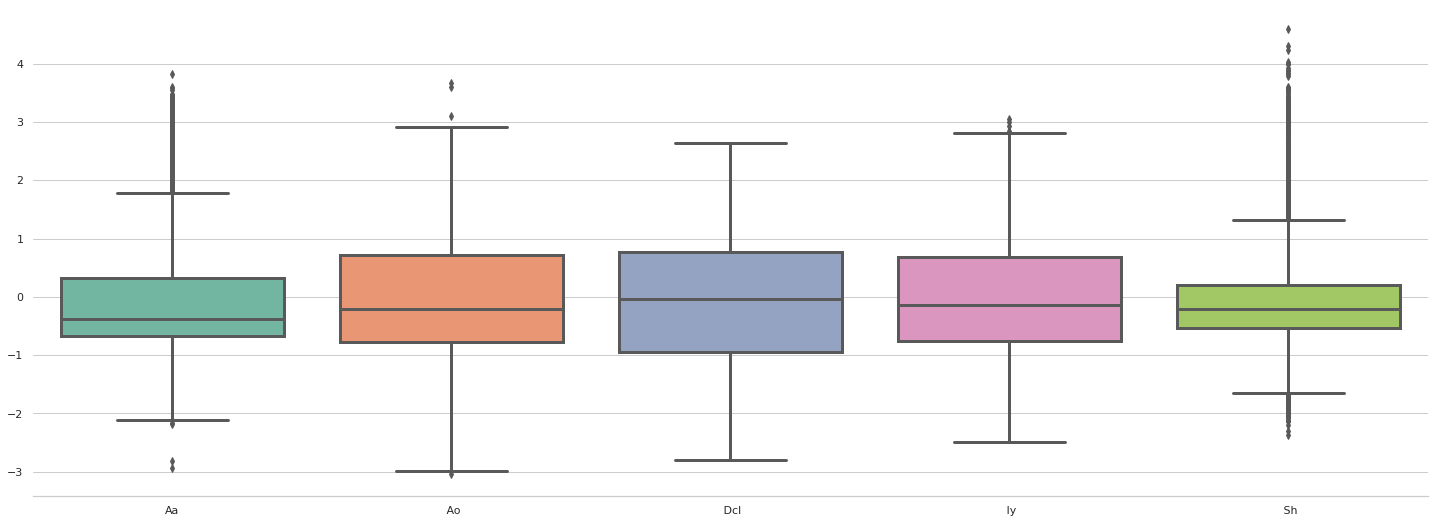

In [8]:
sns.set(rc={'figure.figsize':(25,9)}) # Tamaño de la figura
sns.set(style="whitegrid") # Estilo de la figura
sns.boxplot(data = data_SS, linewidth = 3, palette="Set2", fliersize = 5) # Diagrama Box Plot con los datos con escalamiento estándar
sns.despine(left=True)

## Escalamiento Robusto

Es una transformación de datos cuando hay presencia de datos atípicos u outliers. Por lo general, esta transformación escala los datos en un **rango de cuartiles**, permitiendo escalar los datos independientemente para cada características al computar las estadísticas más importantes de las muestras de los datos, como la media y la desviación estándar. Esta transformación utiliza un método llamado **rango intercuartiles**, que maneja desde el primer cuartil hasta el tercer cuartil.

Veamos un ejemplo práctico de esta transformación de datos:

In [9]:
RS_1 = RobustScaler(quantile_range = (15, 75)) # (Primer cuartil, tercer cuartil)
RS_2 = RobustScaler(quantile_range = (20, 65))
RS_3 = RobustScaler(quantile_range = (30, 60))

data_RS_1 = RS_1.fit_transform(data)
data_RS_2 = RS_2.fit_transform(data)
data_RS_3 = RS_3.fit_transform(data)

data_RS_1 = pd.DataFrame(data = data_RS_1, columns = ['Aa',	' Ao',	' Dcl',	' Iy',	' Sh'])
data_RS_2 = pd.DataFrame(data = data_RS_2, columns = ['Aa',	' Ao',	' Dcl',	' Iy',	' Sh'])
data_RS_3 = pd.DataFrame(data = data_RS_3, columns = ['Aa',	' Ao',	' Dcl',	' Iy',	' Sh'])

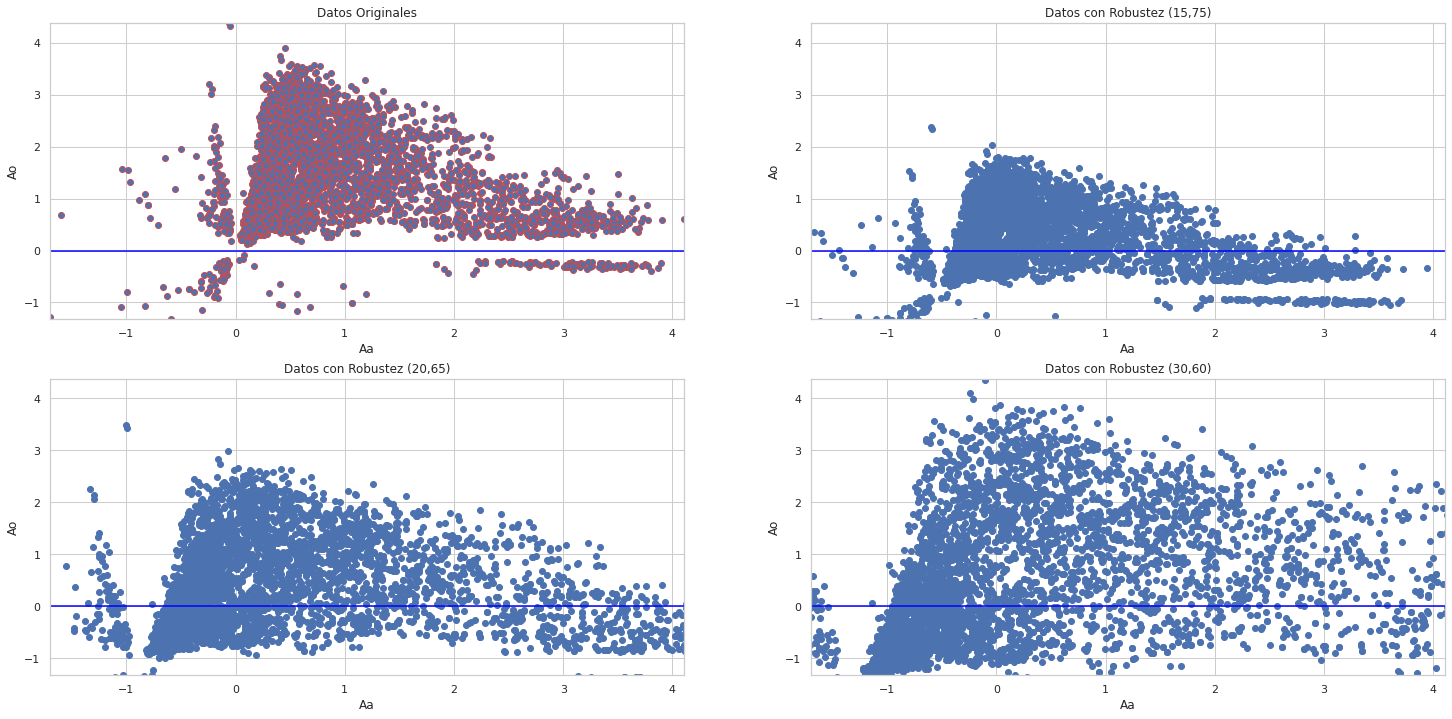

In [10]:
fig = plt.figure(figsize=(25,12))

ax = fig.add_subplot(2, 2, 1)   
ax.scatter(data['Aa'], data[' Ao'], edgecolors="r")
plt.axhline(0, color="blue") # Elegir color de la linea horizontal de referencia
plt.xlim(data['Aa'].min(),data['Aa'].max()) # Definir el rango de valores que desea que aparezca en el gráfico en el eje x
plt.ylim(data[' Ao'].min(),data[' Ao'].max()) # Definir el rango de valores que desea que aparezca en el gráfico en el eje y
plt.title('Datos Originales') # Titulo de la gráfica
plt.xlabel('Aa') # Etiqueta del eje x
plt.ylabel('Ao') # Etiqueta del eje y

ax = fig.add_subplot(2, 2, 2) 
ax.scatter(data_RS_1['Aa'], data_RS_1[' Ao'], edgecolors="b")
plt.axhline(0, color="blue") # Elegir color de la linea horizontal de referencia
plt.xlim(data['Aa'].min(),data['Aa'].max()) # Definir el rango de valores que desea que aparezca en el gráfico en el eje x
plt.ylim(data[' Ao'].min(),data[' Ao'].max()) # Definir el rango de valores que desea que aparezca en el gráfico en el eje y
plt.title('Datos con Robustez (15,75)') # Titulo de la gráfica
plt.xlabel('Aa') # Etiqueta del eje x
plt.ylabel('Ao') # Etiqueta del eje y

ax = fig.add_subplot(2, 2, 3) 
ax.scatter(data_RS_2['Aa'], data_RS_2[' Ao'], edgecolors="b")
plt.axhline(0, color="blue") # Elegir color de la linea horizontal de referencia
plt.xlim(data['Aa'].min(),data['Aa'].max()) # Definir el rango de valores que desea que aparezca en el gráfico en el eje x
plt.ylim(data[' Ao'].min(),data[' Ao'].max()) # Definir el rango de valores que desea que aparezca en el gráfico en el eje y
plt.title('Datos con Robustez (20,65)') # Titulo de la gráfica
plt.xlabel('Aa') # Etiqueta del eje x
plt.ylabel('Ao') # Etiqueta del eje y

ax = fig.add_subplot(2, 2, 4) 
ax.scatter(data_RS_3['Aa'], data_RS_3[' Ao'], edgecolors="b")
plt.axhline(0, color="blue") # Elegir color de la linea horizontal de referencia
plt.xlim(data['Aa'].min(),data['Aa'].max()) # Definir el rango de valores que desea que aparezca en el gráfico en el eje x
plt.ylim(data[' Ao'].min(),data[' Ao'].max()) # Definir el rango de valores que desea que aparezca en el gráfico en el eje y
plt.title('Datos con Robustez (30,60)') # Titulo de la gráfica
plt.xlabel('Aa') # Etiqueta del eje x
plt.ylabel('Ao') # Etiqueta del eje y

plt.show()

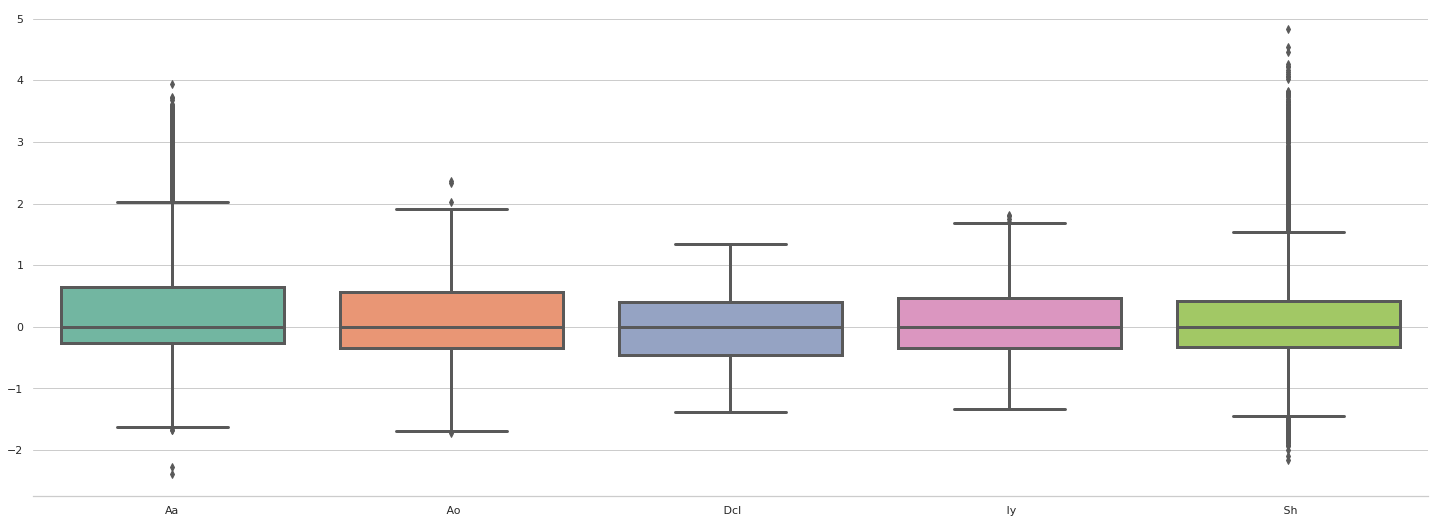

In [11]:
sns.set(rc={'figure.figsize':(25,9)}) # Tamaño de la figura
sns.set(style="whitegrid") # Estilo de la figura
sns.boxplot(data = data_RS_1, linewidth = 3, palette="Set2", fliersize = 5) # Diagrama Box Plot con los datos con escalamiento robusto (15, 75)
sns.despine(left=True)

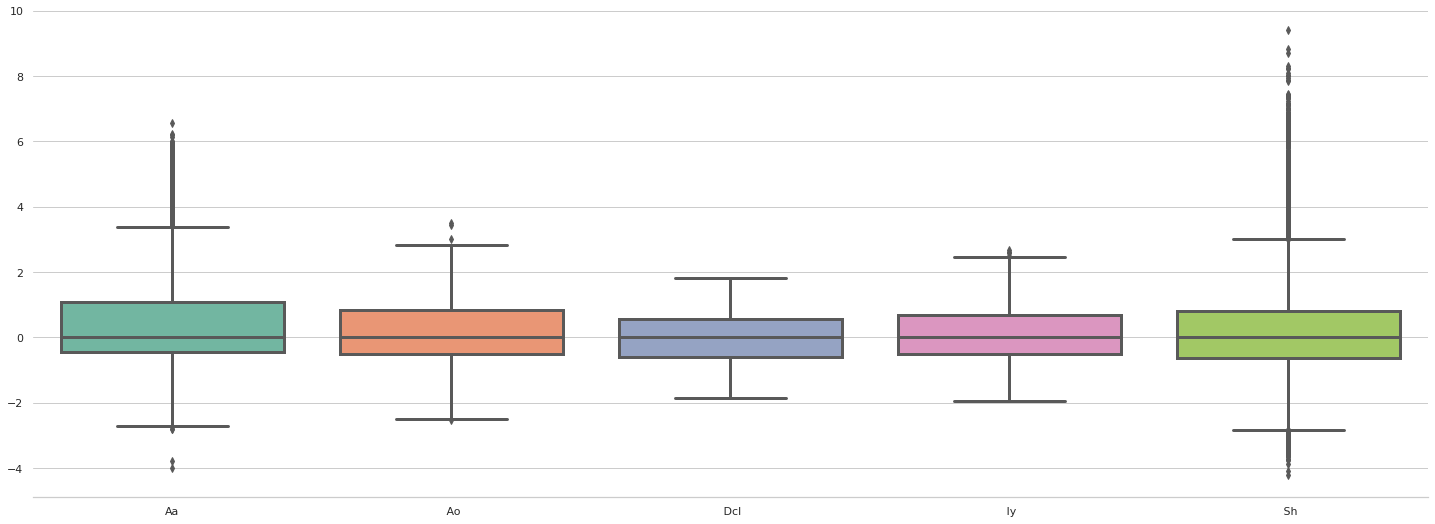

In [12]:
sns.set(rc={'figure.figsize':(25,9)}) # Tamaño de la figura
sns.set(style="whitegrid") # Estilo de la figura
sns.boxplot(data = data_RS_2, linewidth = 3, palette="Set2", fliersize = 5) # Diagrama Box Plot con los datos con escalamiento robusto (15, 75)
sns.despine(left=True)

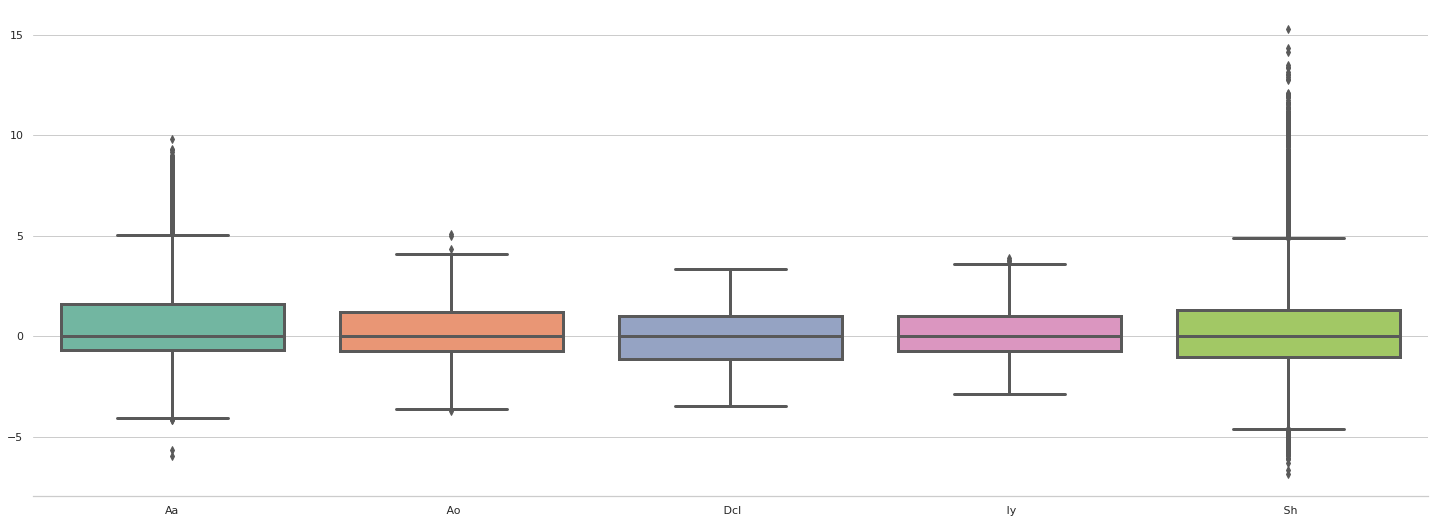

In [13]:
sns.set(rc={'figure.figsize':(25,9)}) # Tamaño de la figura
sns.set(style="whitegrid") # Estilo de la figura
sns.boxplot(data = data_RS_3, linewidth = 3, palette="Set2", fliersize = 5) # Diagrama Box Plot con los datos con escalamiento robusto (15, 75)
sns.despine(left=True)

## Normalización

La **Normalización** se define como una transformación de los datos en una escala entre 0 y 1 (datos normales) o entre un rango menor, es decir, $0 < \hat{x} < 1$. Veamos algunas de estas transformaciones:

### Normalización Min-Max

Esta transformación llamada escalamiento min-max, normaliza los datos a una escala en el rango $\lbrack 0,1 \rbrack$, estrechando todos los datos.

*Definición formal de Min-Max:* Dado $x_{n,d}$ un dato de una muestra $n$ con respecto a una características $d$, decimos que $\hat{x}_{n,d}$ es un dato normalizado, tal que  $0 \leq \hat{x}_{n,d} \leq 1$, donde la normalización es la razón entre la resta $x_{n,d} - xmin_{d}$ y la resta entre $xmax_d - xmin_{d}$, siendo $xmin_{d}$ y $xmax_{d}$ el valor mínimo y máximo de cada característica $d$, respectivamente.

$$\hat{x}_{n,d} = \frac{x_{n,d} - xmin_{d}}{xmax_{d} - xmin_{d}}$$

Veamos un ejemplo de aplicación de esta transformación:

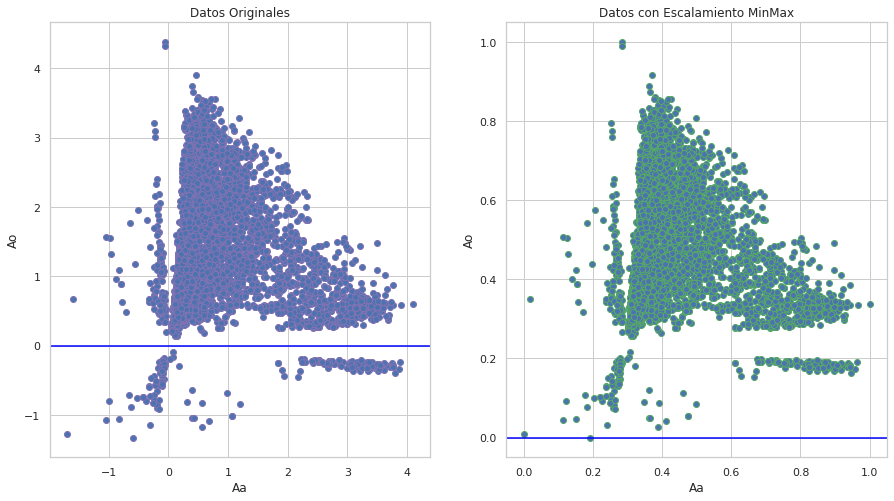

In [14]:
MinMax_1 = MinMaxScaler(copy=True, feature_range=(0, 1)) # Método MinMax con valores entre 0 y 1
data_Min_Max = MinMax_1.fit_transform(data) # Transformación de los nuevos datos con una escala MinMax
data_Min_Max = pd.DataFrame(data = data_Min_Max, columns = ['Aa',	' Ao',	' Dcl',	' Iy',	' Sh'])

fig = plt.figure(figsize=(15,8)) # Se define el tamaño de la figura en ancho y altura    
    
ax = fig.add_subplot(1, 2, 1)   
ax.scatter(data['Aa'], data[' Ao'], edgecolors="m")
plt.axhline(0, color="blue") # Elegir color de la linea horizontal de referencia
plt.title('Datos Originales') # Titulo de la gráfica
plt.xlabel('Aa') # Etiqueta del eje x
plt.ylabel('Ao') # Etiqueta del eje y

ax = fig.add_subplot(1, 2, 2) 
ax.scatter(data_Min_Max['Aa'], data_Min_Max[' Ao'],edgecolors="g")
plt.axhline(0, color="blue") # Elegir color de la linea horizontal de referencia
plt.title('Datos con Escalamiento MinMax') # Titulo de la gráfica
plt.xlabel('Aa') # Etiqueta del eje x
plt.ylabel('Ao') # Etiqueta del eje y

plt.show()

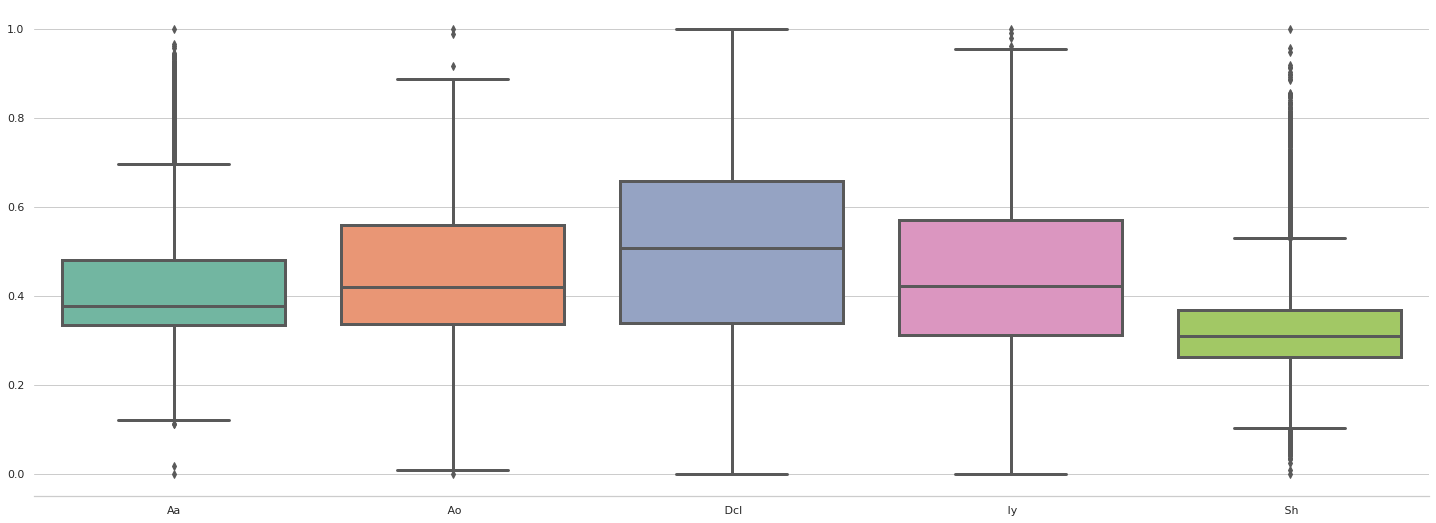

In [15]:
sns.set(rc={'figure.figsize':(25,9)}) # Tamaño de la figura
sns.set(style="whitegrid") # Estilo de la figura
sns.boxplot(data = data_Min_Max, linewidth = 3, palette="Set2", fliersize = 5) # Diagrama Box Plot con los datos con normalización Min-Max
sns.despine(left=True)

### Máxima Normalización 

Es una transformación de datos que relaciona los datos $x_{n,d}$ con respecto al máximo valor de los datos por cada característica $d$, $xmax_{d}$:

$$\hat{x}_{n,d} = \frac{x_{n,d}}{xmax_{d}}$$

NOTA: Si los máximos valores de los datos originales son 1, no hay necesidad de utilizar este método de normalización.

Veamos un ejemplo de aplicación:

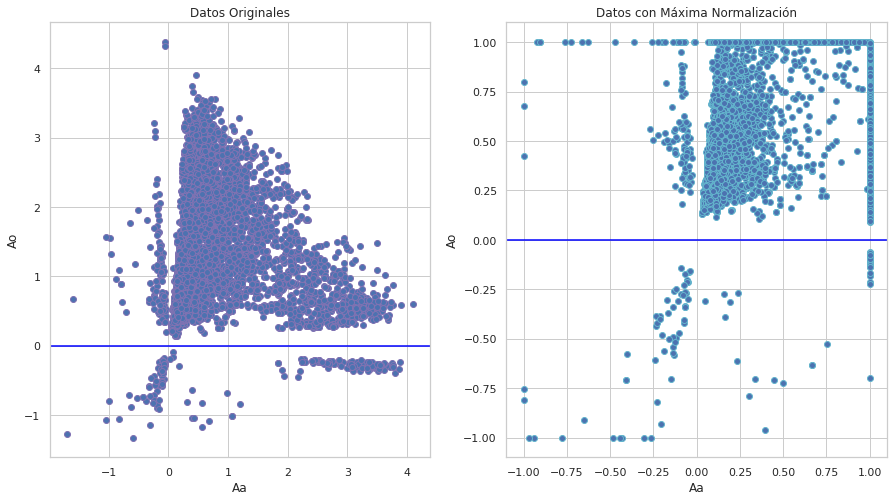

In [16]:
NM = Normalizer(norm ='max') # Método de maxima normalización
data_NM = NM.fit_transform(data)
data_NM = pd.DataFrame(data = data_NM, columns = ['Aa',	' Ao',	' Dcl',	' Iy',	' Sh'])

fig = plt.figure(figsize=(15,8)) # Se define el tamaño de la figura en ancho y altura    
    
ax = fig.add_subplot(1, 2, 1)   
ax.scatter(data['Aa'], data[' Ao'], edgecolors="m")
plt.axhline(0, color="blue") # Elegir color de la linea horizontal de referencia
plt.title('Datos Originales') # Titulo de la gráfica
plt.xlabel('Aa') # Etiqueta del eje x
plt.ylabel('Ao') # Etiqueta del eje y

ax = fig.add_subplot(1, 2, 2) 
ax.scatter(data_NM['Aa'], data_NM[' Ao'], edgecolors="c")
plt.axhline(0, color="blue") # Elegir color de la linea horizontal de referencia
plt.title('Datos con Máxima Normalización') # Titulo de la gráfica
plt.xlabel('Aa') # Etiqueta del eje x
plt.ylabel('Ao') # Etiqueta del eje y

plt.show()

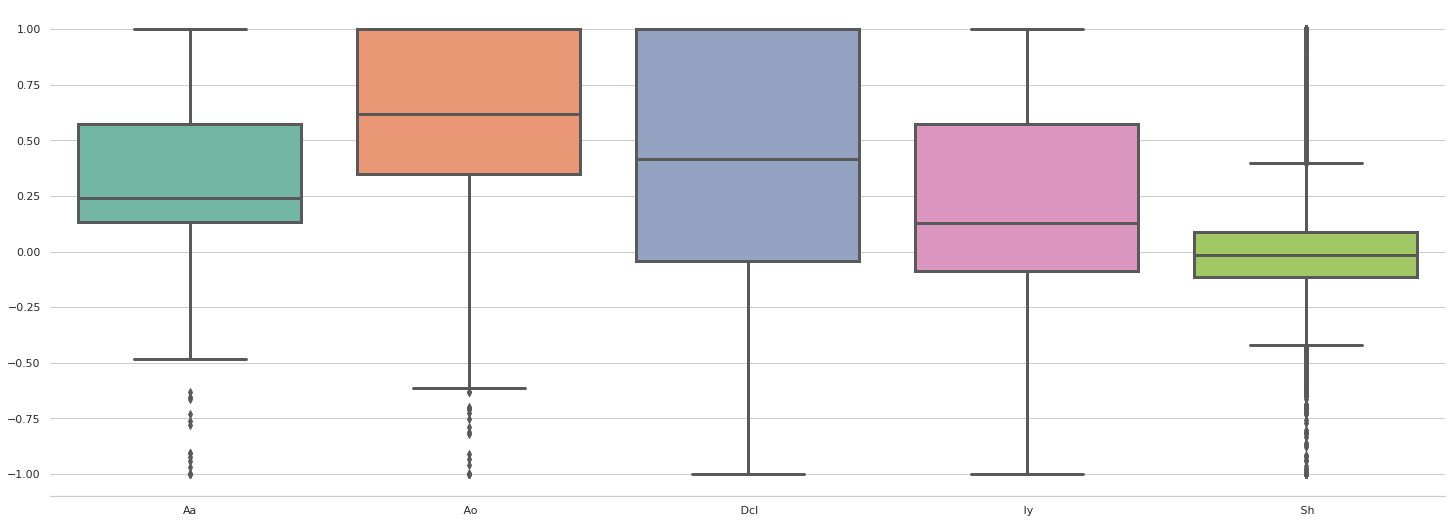

In [17]:
sns.set(rc={'figure.figsize':(25,9)}) # Tamaño de la figura
sns.set(style="whitegrid") # Estilo de la figura
sns.boxplot(data = data_NM, linewidth = 3, palette="Set2", fliersize = 5) # Diagrama Box Plot con los datos con normalización máxima
sns.despine(left=True)

### Normalización L1 - L2

Es una transformación de datos que relaciona los datos $x_{n,d}$ con respecto a una norma L1 o una norma L2 o Euclidiana:

$$L1(x_{n,d}) = \frac{x_{n,d}}{\vert \vert x \vert \vert_{1}} =\frac{x_{n,d}}{\sum_{n=1}^N \vert x_{n,d}\vert}$$

$$L2(x_{n,d}) = \frac{x_{n,d}}{\vert \vert x \vert \vert_{2}}= \frac{x_{n,d}}{\sqrt{\sum_{n=1}^N \vert x_{n,d}\vert^2}}$$

En la norma L2, los datos son divididos o medidos por la longitud del vector en el espacio de coordenadas, lo cual no cambia la forma de la distribución natural de los datos originales debido a que esta normalización siempre se divide por una constante L2, $\vert \vert x \vert \vert_{2}$.

Veamos un ejemplo aplicativo de esta transformación:

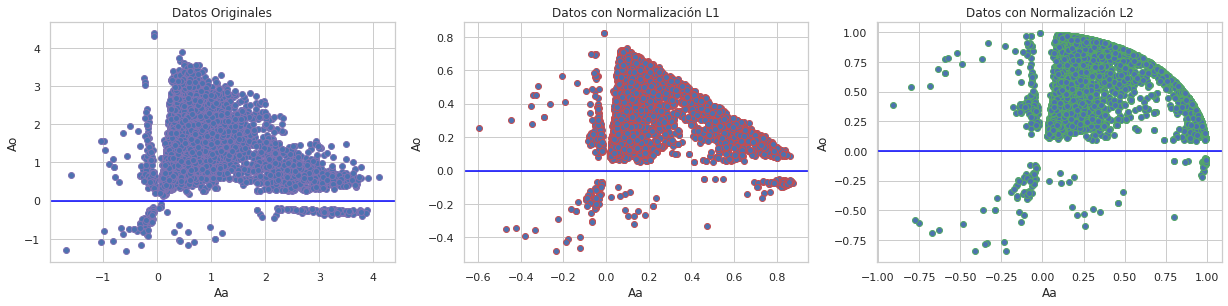

In [18]:
L1 = Normalizer(norm ='l1') # Método de normalización L1
L2 = Normalizer(norm ='l2') # Método de normalización L2

data_L1 = L1.fit_transform(data)
data_L2 = L2.fit_transform(data)
data_L1 = pd.DataFrame(data = data_L1, columns = ['Aa',	' Ao',	' Dcl',	' Iy',	' Sh'])
data_L2 = pd.DataFrame(data = data_L2, columns = ['Aa',	' Ao',	' Dcl',	' Iy',	' Sh'])

fig = plt.figure(figsize=(21,15)) # Se define el tamaño de la figura en ancho y altura    
    
ax = fig.add_subplot(3, 3, 1)   
ax.scatter(data['Aa'], data[' Ao'], edgecolors="m")
plt.axhline(0, color="blue") # Elegir color de la linea horizontal de referencia
plt.title('Datos Originales') # Titulo de la gráfica
plt.xlabel('Aa') # Etiqueta del eje x
plt.ylabel('Ao') # Etiqueta del eje y

ax = fig.add_subplot(3, 3, 2) 
ax.scatter(data_L1['Aa'], data_L1[' Ao'], edgecolors="r")
plt.axhline(0, color="blue") # Elegir color de la linea horizontal de referencia
plt.title('Datos con Normalización L1') # Titulo de la gráfica
plt.xlabel('Aa') # Etiqueta del eje x
plt.ylabel('Ao') # Etiqueta del eje y

ax = fig.add_subplot(3, 3, 3) 
ax.scatter(data_L2['Aa'], data_L2[' Ao'], edgecolors="g")
plt.axhline(0, color="blue") # Elegir color de la linea horizontal de referencia
plt.title('Datos con Normalización L2') # Titulo de la gráfica
plt.xlabel('Aa') # Etiqueta del eje x
plt.ylabel('Ao') # Etiqueta del eje y

plt.show()

In [ ]:
sns.set(rc={'figure.figsize':(25,9)}) # Tamaño de la figura
sns.set(style="whitegrid") # Estilo de la figura
sns.boxplot(data = data_L1, linewidth = 3, palette="Set2", fliersize = 5) # Diagrama Box Plot con los datos con normalización L1
sns.despine(left=True)

In [ ]:
sns.set(rc={'figure.figsize':(25,9)}) # Tamaño de la figura
sns.set(style="whitegrid") # Estilo de la figura
sns.boxplot(data = data_L2, linewidth = 3, palette="Set2", fliersize = 5) # Diagrama Box Plot con los datos con normalización L1
sns.despine(left=True)

## Recomendaciones para el escalamiento de datos

1.   Cuando hay datos muy esparcidos (observándolos en el espacio de características), la normalización min-max y el escalamiento estándar pueden substraer una cantidad de datos desde los datos originales. Para este caso, la normalización min-max genera un desplazamiento sobre los valores mínimos de todas las características de los datos originales. Para el caso del escalamiento estándar, el desplazamiento se genera sobre los valores promedio de todas las características de los datos originales. Lo anterior puede ocasionar una alteración de los datos con valores mínimos o promedio si los datos tienen demasiado esparcidos en el espacio de características.

2.   Considerando el mismo caso de los datos esparcidos, si el desplazamiento no es cero, entonces ambas transformaciones pueden convertir un vector de características dispersa donde la mayoría de los valores son cero cuando los datos están demasiado esparcidos. Lo anterior puede ocasionar un incremento el costo de máquina (consumo de memoría RAM) cuando se construye modelos con algoritmos de machine learning.